In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from least_squares_fit import least_squares_fit


distance [0.23 0.29 0.35 0.41 0.47 0.53 0.59 0.65 0.71]
velocity [175 230 285 340 395 450 505 560 615]
res 301.94000000000005 916.666666666666 382.99895978970983 1.0647987116334694 2.151657414559676
 Least squares fit of 9 data points
 -----------------------------------
 Hubble's constant slope   b = 916.67 +-   2.15  km/s/Mpc
 Intercept with r axis     a = 301.94 +-   1.06  km/s
 Estimated v error bar sigma = 383.0 km/s
 numpy's values:           b = 916.67 +-   0.00  km/s/Mpc
                           a = -35.83 +-   0.00  km/s/Mpc


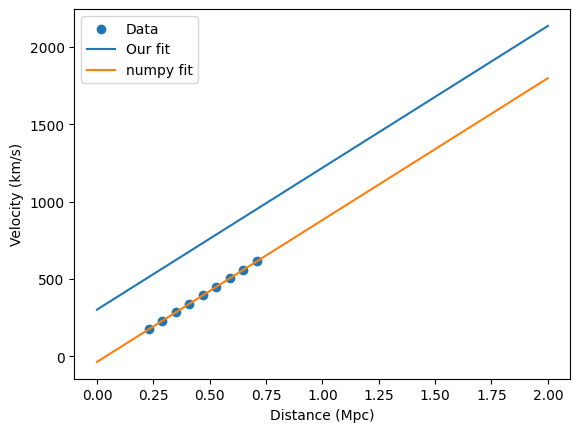

In [14]:

df = pd.read_csv("open_circles9groups.csv")
x_data = df["Distance (megaparsecs)"].to_numpy() # distance
y_data = df["Velocity (km/s)"].to_numpy() # velocity
print("distance", x_data)
print("velocity", y_data)

n = len(x_data)  #number of galaxies

if n <= 2 :
    print ('Error! Need at least two data points!')
    exit()
# using our custom module
[a, b, sigma, sigma_a, sigma_b] = least_squares_fit(x_data, y_data)
print("res", a,b,sigma, sigma_a, sigma_b)

# Check against numpy's version:
p,cov = np.polyfit( x_data, y_data, 1, cov=True)

# Print out results
print (' Least squares fit of', n, 'data points')
print (' -----------------------------------')
print (" Hubble's constant slope   b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( b, sigma_b))
print (" Intercept with r axis     a = {0:6.2f} +- {1:6.2f}  km/s".format( a, sigma_a))
print (' Estimated v error bar sigma =', round(sigma, 1), 'km/s')
print (" numpy's values:           b = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[0], np.sqrt(cov[0,0])))
print ("                           a = {0:6.2f} +- {1:6.2f}  km/s/Mpc".format( p[1], np.sqrt(cov[1,1])))

rvals = np.linspace(0., 2.0, 21)
f = a + b * rvals
fnp = p[1] + p[0] * rvals
plt.figure(1)
plt.scatter( x_data, y_data, label = "Data" )
plt.plot( rvals, f , label="Our fit")
plt.plot( rvals, fnp, label = "numpy fit")
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.legend()

plt.show()


